# Probability Estimation and Calibration

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

<div align="justify">

The predictions delivered by corresponding methods are at best "pseudo-probabilities" that are often not very accurate. 
Besides, there are many methods that deliver natural scores, 
intuitively expressing a degree of confidence 
(like the distance from the separating hyperplane in `support vector machines`), 
but which do not immediately qualify as probabilities either. 
The idea of *scaling* or *calibration methods* is to turn such scores into proper, 
well-calibrated probabilities, that is, 
to learn a mapping from scores to the unit interval that can be applied to the output of a predictor as a kind of post-processing step ({cite:t}`flac_cc17`). 
Examples of such methods include binning ({cite:t}`zadr_oc01`), 
isotonic regression ({cite:t}`zadr_tc02`), 
logistic scaling ({cite:t}`Pla00`) 
and improvements thereof ({cite:t}`kull_bc17`), 
as well as the use of Venn predictors ({cite:t}`joha_vp18`). 
Calibration is still a topic of ongoing research. 

</div>

## Separating Hyperplane in Support Vector Machines

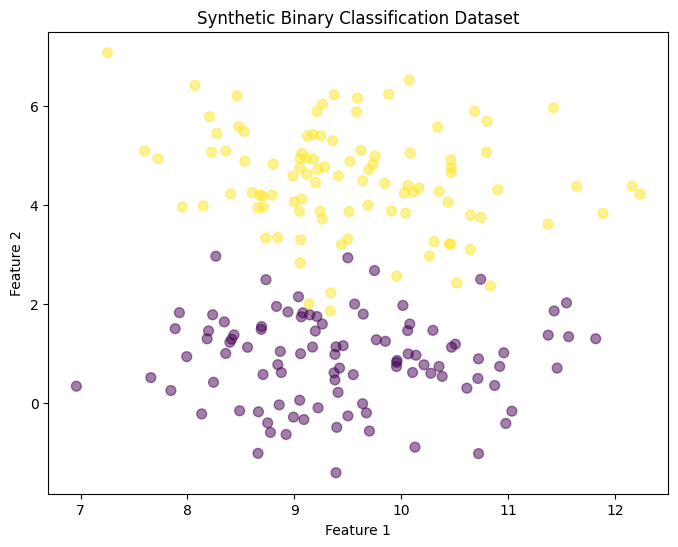

In [13]:
X, y = make_blobs(n_samples=200, centers=2, random_state=4)

clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', alpha=0.5)
plt.title('Synthetic Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


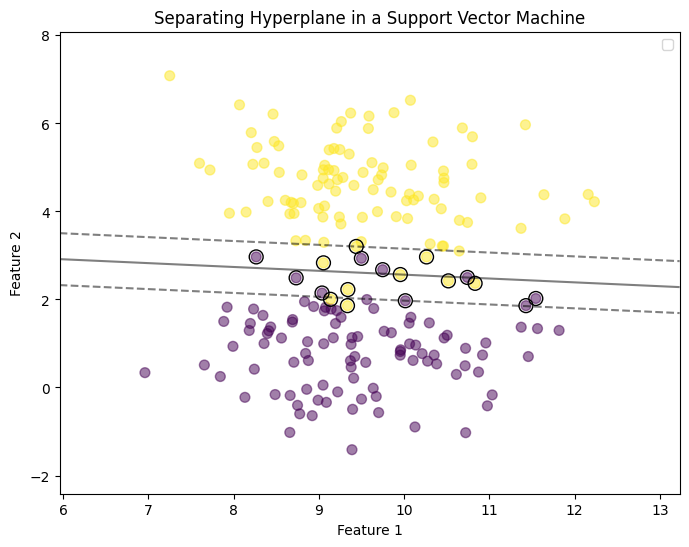

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', alpha=0.5)
plt.title('Separating Hyperplane in a Support Vector Machine')
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf, X, plot_method="contour", colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"], ax=ax)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Isotonic Regression

https://scikit-learn.org/stable/modules/isotonic.html

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html#sphx-glr-auto-examples-miscellaneous-plot-isotonic-regression-py

## Classifier Calibration

```{note}
A lower Brier loss, for instance, does not necessarily mean a better calibrated model, it could also mean a worse calibrated model with much more discriminatory power, e.g. using many more features.
```

https://scikit-learn.org/stable/modules/calibration.html

https://arxiv.org/pdf/2112.10327

({cite:t}`silva_classifier_2023`) 

## Regressor Calibration